# Imports

In [1]:
from io import StringIO
import numpy as np

In [2]:
# spectrum dataclass
from src.spectrum import Spectrum, from_str, from_csv, SpectrumValueType
from src.paths import project_dir

In [3]:
# plotting
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

In [4]:
!python -V

Python 3.9.8


# Small data

In [5]:
yfy_str = """
1 2
2 2
3 2
"""
s = from_str(yfy_str)
print(s)

bin_centers:
[1. 2. 3.]

bin_values_fy:
[2.         1.         0.66666667]

bin_values_yfy:
[2. 2. 2.]

bin_values_ydy:
[1.22222222 2.44444444 3.66666667]

bin_values_dy:
[1.22222222 1.22222222 1.22222222]

bin_values_fy_normalized:
[0.54545455 0.27272727 0.18181818]

bin_values_yfy_normalized:
[0.54545455 0.54545455 0.54545455]

bin_values_dy_normalized:
[0.33333333 0.33333333 0.33333333]

bin_values_ydy_normalized:
[0.33333333 0.66666667 1.        ]




In [6]:
s.yF

1.6363636363636365

Text(0, 0.5, 'ydy')

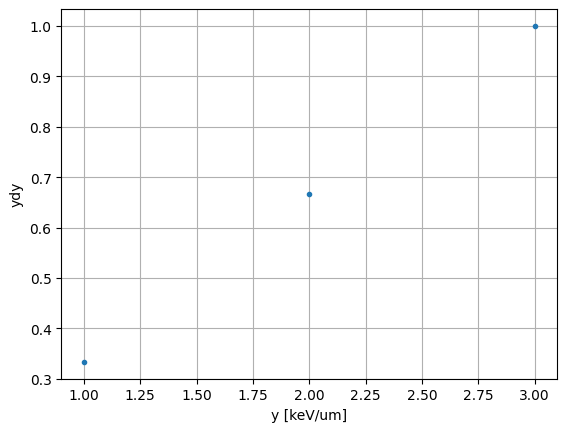

In [7]:
plt.plot(s.y, s.ydy_norm, '.')
#plt.xscale('log')
plt.grid()
plt.xlabel('y [keV/um]')
plt.ylabel('ydy')

# Larger dataset

In [8]:
project_dir / 'data' / 'interim' / 'data.csv'

WindowsPath('C:/Users/Legion/workspace/microdosimetric_spectra_folding/data/interim/data.csv')

In [9]:
spectrum = from_csv(project_dir / 'data' / 'interim' / 'data.csv', delimiter=',', value_type=SpectrumValueType.yfy)
print(spectrum)

bin_centers:
[ 0.14723549  0.16909782  0.18889329  0.22611843  0.25966758  0.28213002
  0.31512591  0.36175358  0.39840591  0.4573331   0.51056237  0.56995833
  0.63623206  0.69981281  0.8141092   0.90799492  1.01219814  1.14362935
  1.25740947  1.40065407  1.5629687   1.84488669  2.00296477  2.29956538
  2.56656704  2.8268924   3.15782321  3.62616632  4.04577311  4.52007509
  4.92222081  5.81298424  6.3234698   7.19545075  8.0812021   8.94264455
  9.87899124 11.36073835 12.52313449 14.19131917 15.63624549 17.22829076
 20.3409357  25.38340391 27.96788164]

bin_values_fy:
[ 2.55758865e-02  2.07176675e-02  2.32111163e-02  2.75314033e-02
  3.13670303e-02  3.60457576e-02  4.19918226e-02  6.29969885e-02
  7.86478440e-02  9.17962100e-02  1.09594076e-01  1.24603462e-01
  1.37015976e-01  1.75751924e-01  1.77525246e-01  1.97387875e-01
  2.22129911e-01  2.44094451e-01  2.57434921e-01  2.75355978e-01
  2.61982646e-01  2.25326503e-01  2.16724492e-01  1.91978098e-01
  1.79576208e-01  1.65289895e-01

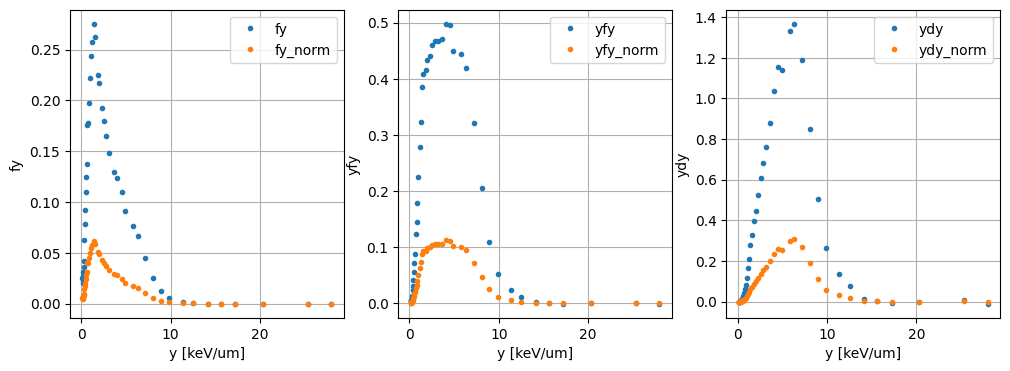

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(spectrum.y, spectrum.fy, '.', label='fy')
ax[0].plot(spectrum.y, spectrum.fy_norm, '.', label='fy_norm')
ax[0].set_ylabel('fy')
ax[1].plot(spectrum.y, spectrum.yfy, '.', label='yfy')
ax[1].plot(spectrum.y, spectrum.yfy_norm, '.', label='yfy_norm')
ax[1].set_ylabel('yfy')
ax[2].plot(spectrum.y, spectrum.ydy, '.', label='ydy')
ax[2].plot(spectrum.y, spectrum.ydy_norm, '.', label='ydy_norm')
ax[2].set_ylabel('ydy')
for a in ax:
    #a.set_xscale('log')
    a.grid()
    a.set_xlabel('y [keV/um]')
    a.legend()